In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [13]:
dataset = load_boston()
data = dataset.data
target = dataset.target
feature_names = dataset.feature_names

In [25]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

price = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

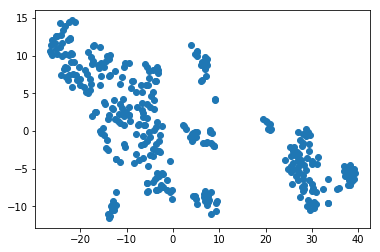

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

In [33]:
kmeans = KMeans(n_clusters=3)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

2    166
0    114
1     74
dtype: int64

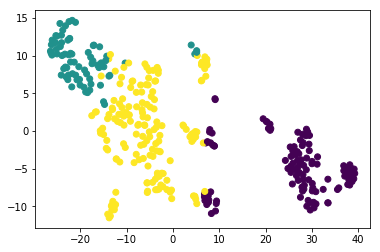

In [36]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [42]:
X_train.loc[labels_train==0, 'CRIM'].mean()

10.10463175438597

In [43]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.07632851351351352

In [44]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.4262868674698794

In [45]:
y_train[labels_train==0].mean()

16.402631578947368

In [46]:
y_train[labels_train==1].mean()

28.089189189189188

In [47]:
y_train[labels_train==2].mean()

25.295783132530122